# ASTR 310 Lecture 16 - matplotlib 1

### Exercise 1: a scatter plot

* Download the file `halos.dat` from today's exercise page. This is a text file containing $x$, $y$, $z$ positions and masses for dark matter halos in a cosmological simulation. Positions are in Mpc and masses are in $M_{\odot}$.

* Create a scatter plot of the $(x,y)$ coordinates of the halos. Represent each halo by a circle whose size is proportional to the logarithm of the halo’s mass.  For example, you might try using a size given by $70[\log(M/M_{\odot}) - 11.3]$.

* Using your favorite color map, make the color of each circle proportional to the $z$-coordinate of the corresponding halo. If you don’t like the default colors, you can change the color map using `plt.set_cmap('Spectral')` or something similar. See the gallery for examples.

* Include an appropriate title and axis labels.

[10 pts]

In [136]:
import numpy as np
import astropy.io.ascii
import astropy.table
import matplotlib.pyplot as plt

In [137]:
table = astropy.io.ascii.read("halos.dat")
table.rename_column('col1', 'x')
table.rename_column('col2', 'y')
table.rename_column('col3', 'z')
table.rename_column('col4', 'mass')
table['size'] = 70*(np.log10(table['mass']) - 11.3)
table

x,y,z,mass,size
float64,float64,float64,float64,float64
42.584,44.506,45.621,505300000000000.0,238.24845087667615
46.593,50.376,22.243,16440000000000.0,134.1131269242821
0.767,28.209,19.144,2735000000000.0,79.58701314686137
20.833,70.433,67.554,2111000000000.0,71.7141763315359
4.379,21.797,74.507,7180000000000.0,108.92871109696102
19.595,23.582,50.171,19390000000000.0,139.13044663550932
1.719,70.401,27.654,1515000000000.0,61.628884298682664
63.351,53.788,38.193,10720000000000.0,121.11363497497258
2.228,16.323,77.722,875600000000.0,44.96140270271255


Text(0, 0.5, 'Y (Mpc)')

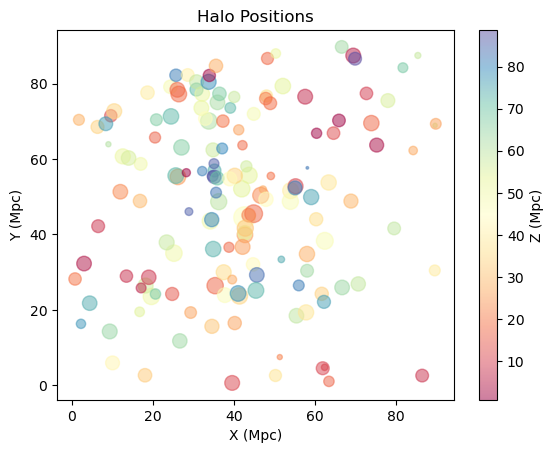

In [138]:
plt.scatter(table['x'], table['y'], c=table['z'], s=table['size'], cmap='Spectral', alpha=0.5)
plt.colorbar().set_label("Z (Mpc)")
plt.title("Halo Positions")
plt.xlabel("X (Mpc)")
plt.ylabel("Y (Mpc)")

### Exercise 2: pulsars

Download the file "atnf_pulsars_20200112.dat" from the exercise page. This is a fixed-width ASCII table containing data from the Australia Telescope National Facility (ATNF) catalog of pulsars in our Galaxy known as of 1/12/20.

* Use `astropy.io.ascii` to read the table. You might need to give the reader some hints about the format or delimiters and that the header starts on line 2. \
We will make use of the pulsar periods $P$ (column `period`), rate of change of periods $\dot{P}$ (column `period_dot`), and companion types (column `companion_type`).

* The companion type will be masked out if the pulsar is an isolated pulsar, or else it will be one of 'MS', 'NS', 'CO', 'He', or 'UL' depending on the type of binary companion. Make two boolean mask arrays to select the pulsars that are in binaries vs. not in binaries. *Hint*: use the `mask` attribute of the `companion_type` column object.

[4 pts]

In [139]:
t2 = astropy.io.ascii.read("atnf_pulsars_20200112.dat", guess=False, delimiter='|', header_start=2, data_start=3)

nonbinaries = t2['companion_type'].mask
binaries = ~nonbinaries

* Make a log-log scatter plot of $\dot{P}$ vs. $P$. Make binary pulsars and isolated pulsars two separate colors, and produce an appropriate legend. Make appropriate axis labels ($P$ is in units of seconds, while $\dot{P}$ is dimensionless).

* Finally, overplot the "pulsar death line." This is (roughly) the function
   $$
   \dot{P}_{\text{death}} = 7.14 \times 10^{-18} \left( \frac{P}{\text{sec}} \right)^{3.2}
   $$
   and corresponds to the line beyond which pulsars stop producing pulses. You can draw a line by defining two points on the line and connecting them.

[6 pts]

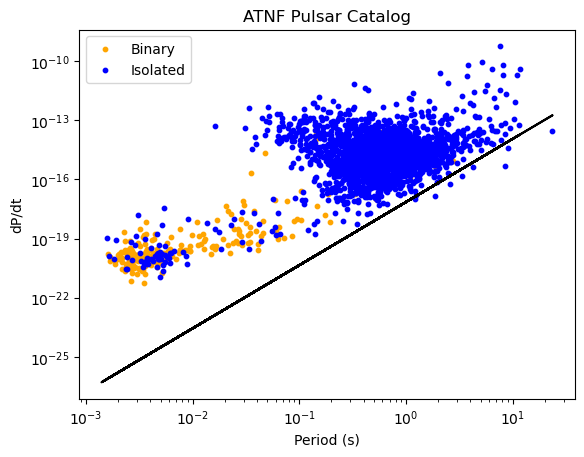

In [145]:
plt.scatter(t2['period'][binaries], t2['period_dot'][binaries], c='orange', s=10)
plt.scatter(t2['period'][nonbinaries], t2['period_dot'][nonbinaries], c='blue', s = 10)
plt.xlabel("Period (s)")
plt.ylabel("dP/dt")
plt.title("ATNF Pulsar Catalog")
plt.legend(["Binary", "Isolated"])
plt.xscale("log")
plt.yscale('log')

t2['deathline'] = 7.14e-18 * (t2['period']**3.2)
plt.plot(t2['period'], t2['deathline'], c='k')

In [141]:
t2

col0,name,ra,dec,period,period_error,period_dot,period_dot_error,dm,dm_error,flux_1400_mhz,flux_1400_mhz_error,spect_index,spect_index_error,a1,a1_error,eccentricity,eccentricity_error,min_mass,median_mass,companion_type,mass_ratio,mass_ratio_error,distance,pulsar_type,age,b_surf,transverse_velocity,_1,deathline
int64,str16,str13,str13,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,float64,float64,float64,str11,float64,float64,float64,int64,float64
--,PSR J1036-8317,10 36 00.0000,-83 17 00.000,0.003408,0.0,--,--,27.0,0.0,--,--,--,--,0.506,0.0,--,--,0.1401,0.1635,He,--,--,0.93,HE,--,--,--,--,9.071871444050527e-26
--,PSR J0211-8159,02 11 59.0000,-81 59 36.200,1.0773327013,8e-10,2.9e-16,2e-17,24.36,0.03,0.3,0.1,--,--,--,--,--,--,--,--,--,--,--,1.52,R,58900000.0,566000000000.0,--,--,9.061867506822521e-18
--,PSR J1900-7951,19 00 24.4000,-79 51 48.200,1.2791931935,6e-10,1.86e-15,3e-17,39.0,5.0,--,--,--,--,--,--,--,--,--,--,--,--,--,2.37,R,10900000.0,1560000000000.0,--,--,1.5699790581930042e-17
--,PSR J1119-7936,11 19 40.8000,-79 36 30.300,2.2805971963,7e-10,3.67e-15,4e-17,27.4,1.4,0.7,0.1,--,--,--,--,--,--,--,--,--,--,--,0.81,R,9850000.0,2930000000000.0,--,--,9.987428592146507e-17
--,PSR J1057-7914,10 57 27.4000,-79 14 24.200,1.3474021612,4e-10,1.327e-15,1.6e-17,51.0,2.0,0.6,0.1,--,--,--,--,--,--,--,--,--,--,--,1.44,R,16100000.0,1350000000000.0,--,--,1.8539131226343153e-17
--,PSR J1159-7910,11 59 35.7100,-79 10 05.600,0.5250742392,3e-10,2.817e-15,6e-18,59.24,0.02,0.7,0.2,-2.0,1.0,--,--,--,--,--,--,--,--,--,1.61,R,2950000.0,1230000000000.0,--,--,9.086664421394126e-19
--,PSR J1841-7845,18 41 25.9000,-78 45 15.000,0.3536025329,4e-10,1.6e-16,7e-17,41.0,2.0,0.4,0.1,--,--,--,--,--,--,--,--,--,--,--,2.46,R,35000000.0,241000000000.0,--,--,2.5641733786118627e-19
--,PSR J1403-7646,14 03 04.1000,-76 46 57.500,1.306197812,8e-10,1.204e-15,1.6e-17,100.6,0.1,0.8,0.2,--,--,--,--,--,--,--,--,--,--,--,5.31,R,17200000.0,1270000000000.0,--,--,1.6785213049829142e-17
--,PSR J1651-7642,16 51 07.8700,-76 42 39.500,1.75531107981,1.8e-10,1.363e-15,8e-18,80.0,10.0,0.7,0.1,--,--,--,--,--,--,--,--,--,--,--,9.23,R,20400000.0,1570000000000.0,--,--,4.3214681163905236e-17
